In [1]:
%load_ext autoreload
%autoreload 2

# Download satellite imagery


We can download satellite imagery through the EOTDL.


Uncomment the following line to install eotdl if needed.


In [2]:
# !pip install eotdl

First, we can check which data collections are supported in the EOTDL.

In [5]:
from eotdl.access import SUPPORTED_COLLECTION_IDS

SUPPORTED_COLLECTION_IDS

['sentinel-1-grd',
 'sentinel-2-l1c',
 'sentinel-2-l2a',
 'dem',
 'hls',
 'landsat-ot-l2']

In [6]:
dates = ("2020-01-01", "2020-01-10")
jaca_bounding_box = (-0.557034, 42.569409, -0.547706, 42.57571)

What happens if you want to download images given a point and a pixel size? Very easy! It can also be done with the EOTDL: the only thing you have to give is the width and height in pixels, and the pixel size. However, for the example we will continue using the Jaca bounding box.


> Important! The pixel size must be in meters!


In [7]:
from eotdl.tools import bbox_from_centroid

x = 12.7
y = 41.8

custom_bbox = bbox_from_centroid(x=x, y=y, pixel_size=10, width=512, height=512)
custom_bbox

[41.77619798649038, 12.677125011757084, 41.82380625978242, 12.722871923867354]

Now, we can search for available Sentinel-2-L2A imagery in Jaca, Spain, between 1 to 10 January, 2020, as seen in the previous [notebook](10_search_sentinel_imagery.ipynb).


In [8]:
from eotdl.access import search_sentinel_imagery, DATA_COLLECTION_ID

r = search_sentinel_imagery(dates, jaca_bounding_box, DATA_COLLECTION_ID.SENTINEL_2_L2A)
list(r)

[{'id': 'S2B_MSIL2A_20200109T110329_N0213_R094_T30TXN_20200109T121919',
  'properties': {'datetime': '2020-01-09T11:09:11Z', 'eo:cloud_cover': 17.46}},
 {'id': 'S2B_MSIL2A_20200109T110329_N0213_R094_T30TYN_20200109T121919',
  'properties': {'datetime': '2020-01-09T11:09:07Z', 'eo:cloud_cover': 0.01}},
 {'id': 'S2B_MSIL2A_20200106T105339_N0213_R051_T30TXN_20200106T121433',
  'properties': {'datetime': '2020-01-06T10:59:14Z', 'eo:cloud_cover': 0.95}},
 {'id': 'S2B_MSIL2A_20200106T105339_N0213_R051_T30TYN_20200106T121433',
  'properties': {'datetime': '2020-01-06T10:59:11Z', 'eo:cloud_cover': 0.08}},
 {'id': 'S2A_MSIL2A_20200104T110441_N0213_R094_T30TXN_20200104T122020',
  'properties': {'datetime': '2020-01-04T11:09:11Z', 'eo:cloud_cover': 63.34}},
 {'id': 'S2A_MSIL2A_20200104T110441_N0213_R094_T30TYN_20200104T122020',
  'properties': {'datetime': '2020-01-04T11:09:07Z', 'eo:cloud_cover': 48.07}},
 {'id': 'S2A_MSIL2A_20200101T105441_N0213_R051_T30TXN_20200101T121106',
  'properties': {'d

> DEM data is quite special, as it is static and we can not search for available data. If we do, we will find that the collection does not exists. On the other hand, if we want to download DEM data it is not necessary to give a time interval neither.


As seen, we have several available images. Let's download the first of them, from the 2020-01-01.


In [9]:
from eotdl.access import download_sentinel_imagery, DATA_COLLECTION_ID

date = "2020-01-01"

download_sentinel_imagery("data/jaca", date, jaca_bounding_box, DATA_COLLECTION_ID.SENTINEL_2_L2A)

As easy as that! Let's take a look on the image!


In [10]:
from glob import glob

raster = glob("data/jaca/*.tiff")[0]
raster

'data/jaca\\sentinel-2-l2a_2020-01-01.tiff'

In [11]:
import rasterio as rio

x = rio.open(raster).read()
x.shape # should be 512x512...

(12, 72, 75)

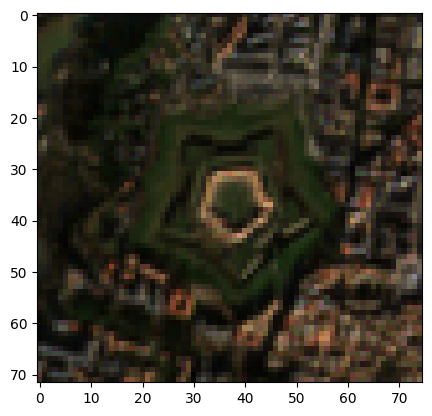

In [12]:
import matplotlib.pyplot as plt

rgb = x[[3, 2, 1], ...] / 4000
plt.imshow(rgb.transpose(1, 2, 0))

In [8]:
import leafmap.leafmap as leafmap

m = leafmap.Map()
m.add_raster(raster, bands=[5, 4, 3], layer_name="Raster")
m

Please restart Jupyter kernel after installation if you encounter any errors when importing leafmap.


Exception: 'type' object is not subscriptable

On the other hand, we may want to download all the available images within a time interval. This can also be handled by the EODL, using the same function.


In [13]:
download_sentinel_imagery(
    output="data/jaca_bulk",
    time_interval=dates,
    bounding_box=jaca_bounding_box,
    collection_id=DATA_COLLECTION_ID.SENTINEL_2_L2A,
)

By default, if we do not give the downloaded images a name, their output name will be `<sensor>_<date>`. However, we can give the images an output name to have more control. Thus, if we only download an image and name it `Jaca`, the image will be saved as `Jaca`. If, on the other hand, several images are downloaded, they will be saved as `Jaca_<date>`. Thus, we can customize the name according to our needs.


In [14]:
# This will save the image as `Jaca.tif`
download_sentinel_imagery(
    output="data/jaca_bulk",
    time_interval="2020-01-04",
    bounding_box=jaca_bounding_box,
    collection_id=DATA_COLLECTION_ID.SENTINEL_2_L2A,
    name="Jaca",
)

In [15]:
# This will save the images as `Jaca_<date>.tif`
download_sentinel_imagery(
    output="data/jaca_bulk",
    time_interval=("2020-01-01", "2020-01-10"),
    bounding_box=jaca_bounding_box,
    collection_id=DATA_COLLECTION_ID.SENTINEL_2_L2A,
    name="Jaca",
)

What if we want to see a random image? We can display it and explore it interactively using [leafmap](https://leafmap.org/).


In [8]:
from glob import glob

rasters = glob("data/jaca_bulk/*.tiff")
rasters

['data/jaca_bulk\\Jaca.tiff',
 'data/jaca_bulk\\Jaca_2020-01-01.tiff',
 'data/jaca_bulk\\Jaca_2020-01-04.tiff',
 'data/jaca_bulk\\Jaca_2020-01-06.tiff',
 'data/jaca_bulk\\Jaca_2020-01-09.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-01.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-02.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-04.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-05.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-06.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-07.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-09.tiff',
 'data/jaca_bulk\\sentinel-2-l2a_2020-01-10.tiff']

In [9]:
import leafmap.leafmap as leafmap
from random import choice

m = leafmap.Map()
raster = choice(rasters)
m.add_raster(raster, bands=[5, 4, 3], layer_name="Raster")
m

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [17]:
date = "2022-08-12"
bbox = (12.04609, 55.83039, 12.06563, 55.84236)
download_sentinel_imagery(
    output="data/test_bulk",
    time_interval=date,
    bounding_box=bbox,
    collection_id=DATA_COLLECTION_ID.SENTINEL_2_L2A,
)